In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from mnist import MNIST

mndata = MNIST(r"C:\Users\Kacper\sample")

digits, labels = mndata.load_training()
#images_2, labels_2 = mndata.load_testing()

In [3]:
digits_train=np.array(digits)
digits_label_train=np.array(labels)
digits_test,digits_label_test= mndata.load_testing()
digits_test=np.array(digits_test)
digits_label_test=np.array(digits_label_test)

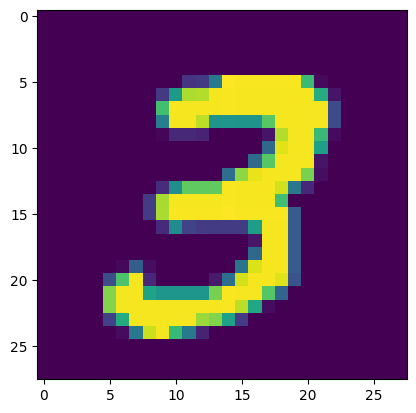

In [4]:
plt.imshow(digits_train[7].reshape(28,28));

In [5]:
def t_predict_1nn(img,  train_images=digits_train, train_labels=digits_label_train):
    #print((train_images-img)**2)
    return train_labels[np.argmin(np.sum(np.abs((train_images-img)),axis=1))]
    #return train_labels[np.argmin(((train_images-img)**2).sum())]

In [ ]:
#t_predict_1nn(digits_test[i],digits_train,digits_label_train)

In [7]:
def predict_1nn(img, train_images=digits_train, train_labels=digits_label_train):
    best_img = -1
    best_distance = float("inf")    
    for i,comparision in enumerate(train_images):
        cur_distance = distance_value(img,comparision)
        if cur_distance < best_distance:
            best_distance = cur_distance
            best_img = i
    return train_labels[best_img]

In [8]:
def distance_value(actual_img,compare_img):
    return ((actual_img-compare_img)**2).sum()
#**(1/(actual_img.size))  #only sum required

In [9]:
import time

# get the start time
st = time.process_time()

y_dash=[predict_1nn(i,digits_train,digits_label_train) for i in digits_test[0:100]]
# wait for 3 seconds
time.sleep(1)

# get the end time
et = time.process_time()

# get execution time
res = et - st
print('CPU Execution time:', res, 'seconds')

CPU Execution time: 70.59375 seconds


In [18]:
import time

# get the start time
st = time.process_time()

neigh = KNeighborsClassifier(n_neighbors=1,algorithm="brute")
neigh.fit(digits_train,digits_label_train)
y_dash= neigh.predict(digits_test)

# wait for 3 seconds
time.sleep(1)

# get the end time
et = time.process_time()

# get execution time
res = et - st
print('CPU Execution time:', res, 'seconds')

CPU Execution time: 68.703125 seconds


In [21]:
import time

# get the start time
st = time.process_time()

neigh = KNeighborsClassifier(n_neighbors=1,algorithm="brute",n_jobs=-1)
neigh.fit(digits_train,digits_label_train)
y_dash= neigh.predict(digits_test)

# wait for 3 seconds
time.sleep(1)

# get the end time
et = time.process_time()

# get execution time
res = et - st
print('CPU Execution time:', res, 'seconds')

CPU Execution time: 97.09375 seconds


In [11]:
print(np.equal(np.array(y_dash),np.array(digits_label_test)).sum()/np.array(digits_label_test).shape[0])

0.9691


In [20]:
import time

# get the start time
st = time.process_time()

y_dash= list(map(t_predict_1nn,digits_test[0:100,]))

# wait for 3 seconds
time.sleep(1)

# get the end time
et = time.process_time()

st_2 = time.process_time()
for i in range(100):
    t_predict_1nn(digits_test[i],digits_train,digits_label_train),digits_label_test[i]
et_2 = time.process_time()
# get execution time
res = et - st
res2=et_2-st_2
print('y_dash - CPU Execution time:', res, 'seconds')
print('NEW - CPU Execution time:', res2, 'seconds')

y_dash - CPU Execution time: 23.5 seconds
NEW - CPU Execution time: 22.90625 seconds


In [ ]:
break
#bonus try 1-shot

#img=digits_test[1]
#print(digits_test)

"""
exper=digits_test[0:20]
print(exper.shape)
digits_label_train[np.argmin(np.sum(np.abs((digits_train-img)),axis=1))]
"""

###
#digits_label_train[[X]] #20x1
# np.argmin(X,axis=1?)   #20x1
#np.sum(X,axis=1) #20x6000
#np.abs(X) #20x28^2x6000x28^2
#digits_train-img   6000x28^2-20x28^2

In [ ]:
#julia(1-core) ~480 sec
#python(numpy support) ~2200 sec
#python(full C sklearn) ~102 sec
#python(pure) A LOT sec

#python_time ~=  4.6*julia_time
#julia_score_4_score_max = 5pkt
#python_score_recode_max = 1/2 pkt
#python_score_sklearn_max = 20pkt

In [16]:
st_normal = time.time()

neigh = KNeighborsClassifier(n_neighbors=1,algorithm="brute",n_jobs=-1)
neigh.fit(digits_train,digits_label_train)
y_dash= neigh.predict(digits_test)

# wait for 3 seconds
time.sleep(3)


# get the end time
et_normal = time.time()

# get the execution time
elapsed_time = et_normal - st_normal
print('Execution time:', elapsed_time, 'seconds')

Execution time: 48.870588064193726 seconds


In [22]:
st_normal = time.time()

neigh = KNeighborsClassifier(n_neighbors=1,algorithm="brute")
neigh.fit(digits_train,digits_label_train)
y_dash= neigh.predict(digits_test)

# wait for 3 seconds
time.sleep(3)


# get the end time
et_normal = time.time()

# get the execution time
elapsed_time = et_normal - st_normal
print('Execution time:', elapsed_time, 'seconds')

Execution time: 29.432461977005005 seconds
